**Description**
Context

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

# **Objective**


They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# **Data Description**

**Age**: The age of the individual in years.

**Gender**: The gender of the individual, categorized as male or female.

**Profession**: The occupation or profession of the individual.

**Marital_status**: The marital status of the individual, such as married &, single

**Education**: The educational qualification of the individual Graduate and Post Graduate

**No_of_Dependents**: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

**Personal_loan**: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

**House_loan**: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

**Partner_working**: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

**Salary**: The individual's salary or income.

**Partner_salary**: The salary or income of the individual's partner, if applicable.

**Total_salary**: The total combined salary of the individual and their partner (if applicable).

**Price**: The price of a product or service.

**Make**: The type of automobile


Scoring guide (Rubric) - PDS Graded Project (Coded) Rubric
Criteria	Points

**Data Overview**
- Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights


**Univariate Analysis**

- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

**Bivariate Analysis**

- Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

**Key Questions**

-Explore the data to answer the following key questions:

**1. Do men tend to prefer SUVs more compared to women?**

**2. What is the likelihood of a salaried person buying a Sedan?**

**3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?**

**4. How does the the amount spent on purchasing automobiles vary by gender?**

**5. How much money was spent on purchasing automobiles by individuals who took a personal loan?**

**6. How does having a working partner influence the purchase of higher-priced cars?**


Actionable Insights & Recommendations
- Actionable Insights - Business Recommendations

Business Report Quality


**importing the reqiured libraries**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**loading the dataset**

In [3]:
path='/content/drive/MyDrive/datasets/austo_automobile+29+29.csv'
data=pd.read_csv(path)
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
0,53,Male,Business,married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,50-60
1,53,Female,Salaried,married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,50-60
2,53,Female,Salaried,married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,50-60
3,53,Female,Salaried,married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,50-60
4,53,Male,Salaried,married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,50-60


**Structure Of Dataset**

In [4]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1581 rows and 15 columns.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1565 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
 14  Age_group         1581 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 185.4+ KB


In [6]:
data.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1565.0,19430.415335,19673.824449,0.0,0.0,25200.0,38200.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [9]:
summary_stats = data.describe().loc[['count', 'mean', 'std']]
print(summary_stats)

               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1565.000000   
mean     31.922201          2.457938  60392.220114    19430.415335   
std       8.425978          0.943483  14674.825044    19673.824449   

       Total_salary         Price  
count   1581.000000   1581.000000  
mean   79625.996205  35597.722960  
std    25545.857768  13633.636545  


**General Insights:**

Age: Most people are between 25 and 38 years old.

No_of_Dependents: Typically, people have 2 dependents, with very few having 4.

Salaries: There is a wide range of salaries, with the top 25% earning more than
71800 and the  bottom 25% earning less than $51,900.

Partner_salary: The distribution is skewed, with many partners earning little or no salary, while some earn a lot (up to $80,500).

Total_salary: Combined income also varies widely, with the highest combined salary reaching $171,000.

In [10]:
data['Make'].nunique()


3

In [11]:
data['Make'].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [12]:
data['Gender'].nunique()

2

In [13]:
data['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000., 40500., 80100., 50400.,
       80400., 60900.,   400., 60100., 70200., 30000., 40300., 40800.,
       70800.,   900., 45000., 40600., 50700., 80500., 27700., 35800.,
       26600., 60000., 27900., 60800., 40000., 70100., 38100., 38200.,
       30200., 38500., 50900., 35100., 38700., 38300., 38900., 23200.,
       24700., 30800., 28100., 70500., 38400., 38000., 23100., 30100.,
       25700.,    nan, 70400.,   200., 30900., 26100., 45700., 28200.,
       70900., 38800., 45200., 26800., 35300., 60400., 30300., 25800.,
         800., 38600., 24500., 30700., 28500., 24900., 35900., 30500.,
       28900., 27200., 45900., 25300., 35600., 25000., 25200., 26300.,
       35700., 23800., 32700., 30600., 45600., 28000., 32600., 28600.,
       25100., 26700., 24200., 25900., 22100., 25400., 28400., 28300.,
      

**Treating the Gender column**

In [14]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
data['Gender'].apply(type).value_counts()

,count
Gender,
<class 'str'>,1581


In [16]:
def clean_gender(Gender):
    if pd.isna(Gender):
        return np.nan
    elif Gender in ['Male']:
        return 'Male'
    elif Gender in ['Female', 'Femal', 'Femle']:
        return 'Female'
    else:
        return np.nan

In [17]:
data['Gender'] = data['Gender'].apply(clean_gender)


In [18]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
data.to_csv('/content/drive/MyDrive/datasets/austo_automobile+29+29.csv', index=False)

In [20]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
0,53,Male,Business,married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,50-60
1,53,Female,Salaried,married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,50-60
2,53,Female,Salaried,married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,50-60
3,53,Female,Salaried,married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,50-60
4,53,Male,Salaried,married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,50-60


In [21]:
data.loc[data['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
241,43,Male,Salaried,single,Graduate,2,Yes,No,No,53300,NaN,53300,33000,Sedan,40-50
361,39,Male,Business,single,Post Graduate,1,No,No,No,71800,NaN,71800,54000,Sedan,30-40
366,39,Male,Salaried,single,Graduate,1,Yes,Yes,No,59500,NaN,59500,55000,Sedan,30-40
473,36,Female,Salaried,single,Graduate,2,Yes,No,No,47300,NaN,47300,66000,SUV,30-40
803,29,Male,Business,single,Post Graduate,2,No,No,No,73100,NaN,73100,23000,Hatchback,20-30
826,29,Male,Salaried,single,Post Graduate,0,Yes,Yes,No,62300,NaN,62300,20000,Hatchback,20-30
829,29,Female,Salaried,single,Post Graduate,2,No,No,No,58200,NaN,58200,43000,Sedan,20-30
936,28,Male,Business,single,Post Graduate,0,No,Yes,No,66300,NaN,66300,22000,Hatchback,20-30
965,28,Male,Business,single,Graduate,2,Yes,Yes,No,43500,NaN,43500,27000,Hatchback,20-30
1051,27,Male,Salaried,single,Post Graduate,1,Yes,No,No,62700,NaN,62700,26000,Hatchback,20-30


**Filling the missing values in 'Partner_salary'**


In [22]:
data['Marital_status'] = data['Marital_status'].str.strip().str.lower()

married_individuals = data[(data['Marital_status'] == 'married') & (data['Partner_salary'].isnull())]

data.loc[married_individuals.index, 'Partner_salary'] = married_individuals['Total_salary'] - married_individuals['Salary']

print("Null values in Partner_salary after filling:", data['Partner_salary'].isnull().sum())

data.to_csv('/content/drive/MyDrive/datasets/austo_automobile+29+29.csv', index=False)

print("Missing values in Partner_salary treated and data saved to CSV.")

Null values in Partner_salary after filling: 16
Missing values in Partner_salary treated and data saved to CSV.


In [23]:
data.loc[data['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
241,43,Male,Salaried,single,Graduate,2,Yes,No,No,53300,NaN,53300,33000,Sedan,40-50
361,39,Male,Business,single,Post Graduate,1,No,No,No,71800,NaN,71800,54000,Sedan,30-40
366,39,Male,Salaried,single,Graduate,1,Yes,Yes,No,59500,NaN,59500,55000,Sedan,30-40
473,36,Female,Salaried,single,Graduate,2,Yes,No,No,47300,NaN,47300,66000,SUV,30-40
803,29,Male,Business,single,Post Graduate,2,No,No,No,73100,NaN,73100,23000,Hatchback,20-30
826,29,Male,Salaried,single,Post Graduate,0,Yes,Yes,No,62300,NaN,62300,20000,Hatchback,20-30
829,29,Female,Salaried,single,Post Graduate,2,No,No,No,58200,NaN,58200,43000,Sedan,20-30
936,28,Male,Business,single,Post Graduate,0,No,Yes,No,66300,NaN,66300,22000,Hatchback,20-30
965,28,Male,Business,single,Graduate,2,Yes,Yes,No,43500,NaN,43500,27000,Hatchback,20-30
1051,27,Male,Salaried,single,Post Graduate,1,Yes,No,No,62700,NaN,62700,26000,Hatchback,20-30


# **Univariate Analysis**

In [24]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


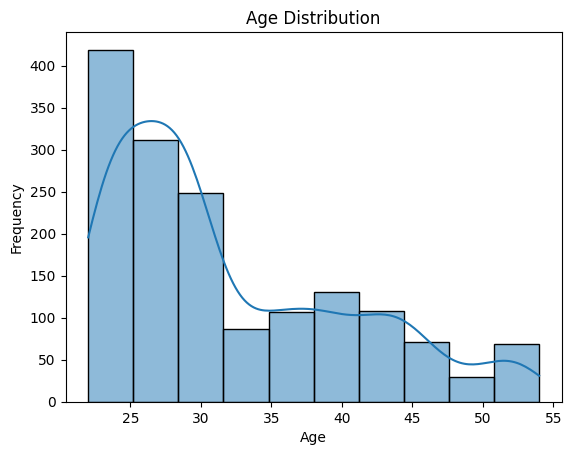

In [25]:
sns.histplot(data['Age'], bins=10, kde=True,)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

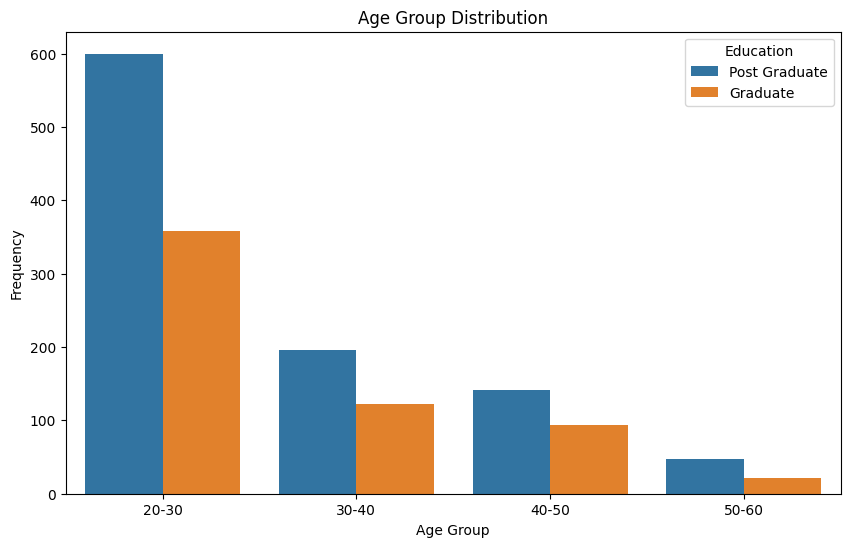

In [26]:
data['Age_group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_group', data=data,hue='Education')

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

plt.show()

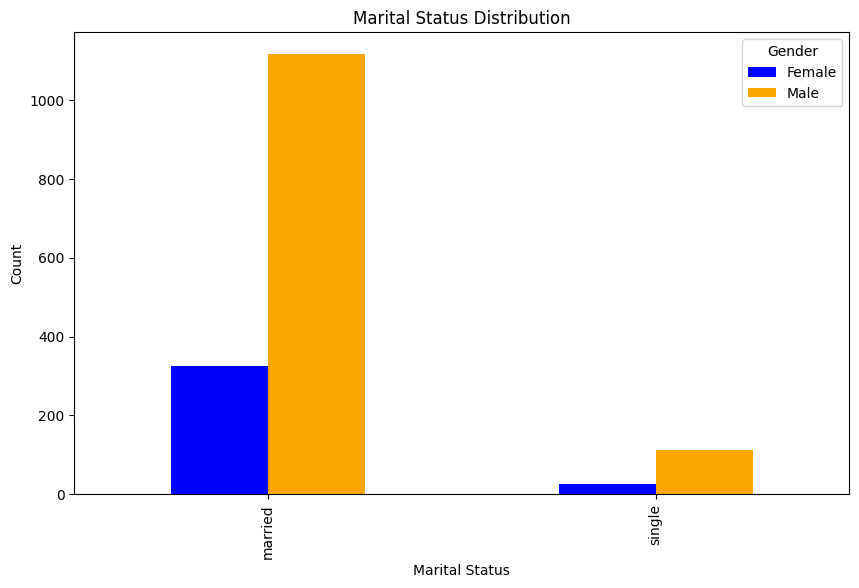

In [84]:
marital_gender_counts = data.groupby(['Marital_status', 'Gender']).size().unstack()

marital_gender_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

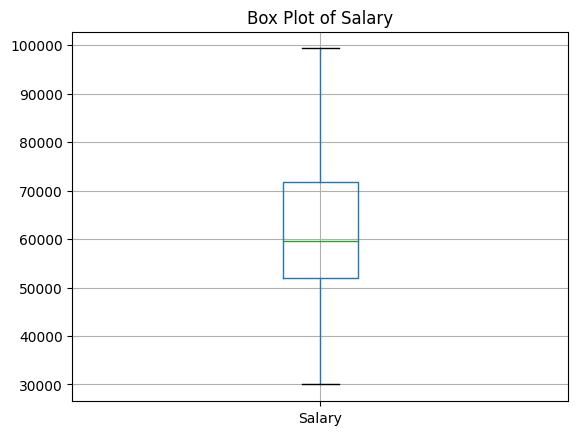

In [28]:
data.boxplot(column='Salary')
plt.title('Box Plot of Salary')
plt.show()

Bivariate analysis


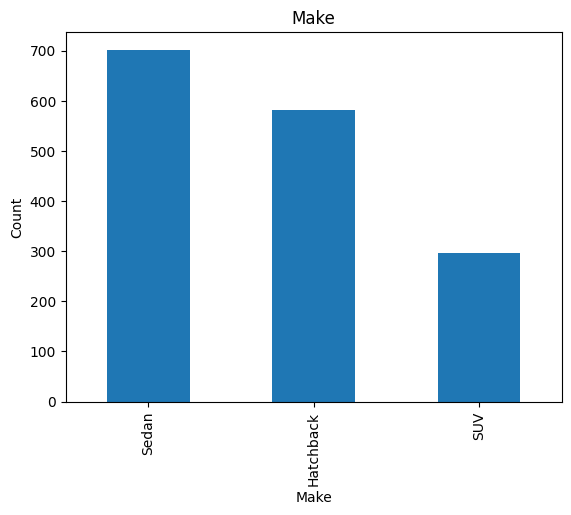

In [29]:
data['Make'].value_counts().plot(kind='bar')
plt.title('Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Filling the missing Gender values based on above plots

Married Individuals:

-filter the dataset to find rows where Marital_status is "married" and Gender is missing. For these rows, we assign a gender based on a 70% male and 30% female probability.

SUV Buyers:

-filter for rows where Make contains "SUV" (indicating they are SUV buyers) and the Gender is missing. For these rows, we assign genders with a 60% probability for female and 40% for male.


Fill Remaining Missing Genders:

-Any rows that still have missing Gender values after the first two conditions are filled with equal probability (50% male, 50% female).

In [30]:
def fill_gender(data):

    married_mask = (data['Marital_status'] == 'married') & (data['Gender'].isna())
    data.loc[married_mask, 'Gender'] = np.random.choice(
        ['Male', 'Female'],
        size=married_mask.sum(),
        p=[0.7, 0.3]  # 70% male, 30% female
    )


    suv_mask = data['Make'].str.contains('SUV', case=False, na=False) & data['Gender'].isna()
    data.loc[suv_mask, 'Gender'] = np.random.choice(
        ['Female', 'Male'],
        size=suv_mask.sum(),
        p=[0.6, 0.4]  # 60% female, 40% male
    )

    remaining_mask = data['Gender'].isna()
    data.loc[remaining_mask, 'Gender'] = np.random.choice(
        ['Male', 'Female'],
        size=remaining_mask.sum(),
        p=[0.5, 0.5]  # 50% male, 50% female for the rest
    )

    return data

data = fill_gender(data)

print(data['Gender'].value_counts())

Gender
Male      1229
Female     352
Name: count, dtype: int64


In [31]:
data.to_csv('/content/drive/MyDrive/datasets/austo_automobile+29+29.csv', index=False)

In [32]:
data.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [89]:
import plotly.express as px

# Filter SUV data
suv_data = data[data['Make'].str.contains('SUV', case=False, na=False)]

# Count SUVs by Gender
gender_suv_count = suv_data['Gender'].value_counts().reset_index()
gender_suv_count.columns = ['Gender', 'Count']

# Create bar plot
fig = px.bar(
    gender_suv_count,
    x='Gender',
    y='Count',
    color='Gender',
    title='SUV Preference by Gender',
    labels={'Count': 'Count of SUV ', 'Gender': 'Gender'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Update layout for bold and larger font size
fig.update_layout(
    width=900,
    height=700,
    bargap=0.6,
    xaxis_title="Gender",
    yaxis_title="Count of SUV Preference",
    showlegend=False,
    template="plotly_white",
    title_font=dict(size=22, color='black', family="Arial Black"), # Removed bold=True and changed font to Arial Black
    xaxis=dict(title_font=dict(size=18, color='black', family="Arial Black")), # Removed bold=True and changed font to Arial Black
    yaxis=dict(title_font=dict(size=18, color='black', family="Arial Black")), # Removed bold=True and changed font to Arial Black
)

# Show plot
fig.show()

In [34]:
make_price_stats = data.groupby('Make')['Price'].agg(['mean', 'min', 'max']).reset_index()

make_price_stats.columns = ['Make', 'Average Price', 'Min Price', 'Max Price']

print(make_price_stats)


        Make  Average Price  Min Price  Max Price
0  Hatchback   26474.226804      18000      33000
1        SUV   55824.915825      31000      70000
2      Sedan   34603.988604      18000      55000


In [35]:
salaried_individuals = data[data['Profession'] == 'Salaried']

print("Salaried Individuals Data:")
print(salaried_individuals)

Salaried Individuals Data:
      Age  Gender Profession Marital_status      Education  No_of_Dependents  \
1      53  Female   Salaried        married  Post Graduate                 4   
2      53  Female   Salaried        married  Post Graduate                 3   
3      53  Female   Salaried        married       Graduate                 2   
4      53    Male   Salaried        married  Post Graduate                 3   
5      53  Female   Salaried        married  Post Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1569   22    Male   Salaried        married       Graduate                 3   
1574   22    Male   Salaried        married       Graduate                 3   
1575   22    Male   Salaried        married       Graduate                 3   
1576   22    Male   Salaried         single       Graduate                 2   
1580   22    Male   Salaried        married       Graduate                 4   

     Persona

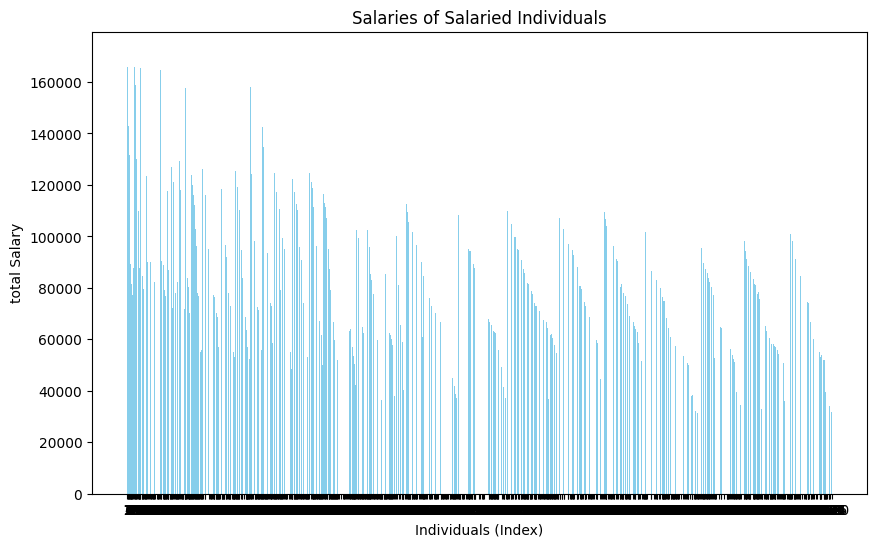

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(salaried_individuals.index, salaried_individuals['Total_salary'], color='skyblue')

plt.title('Salaries of Salaried Individuals')
plt.xlabel('Individuals (Index)')
plt.ylabel('total Salary')
plt.xticks(ticks=salaried_individuals.index, labels=salaried_individuals.index)  # Labels as indices

plt.show()

In [37]:
salaried_individuals.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,896.000000,896.000000,896.000000,887.000000,896.000000,896.000000
mean,32.960938,2.433036,61013.950893,19548.365276,80365.959821,37313.616071
std,8.731605,0.952493,14943.266102,20195.922837,26395.282966,13926.016563
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,26.000000,2.000000,52175.000000,0.000000,60500.000000,26000.000000
50%,30.000000,2.000000,59800.000000,25100.000000,78000.000000,33000.000000
75%,39.000000,3.000000,72800.000000,38300.000000,96650.000000,50000.000000
max,54.000000,4.000000,99300.000000,80400.000000,171000.000000,70000.000000


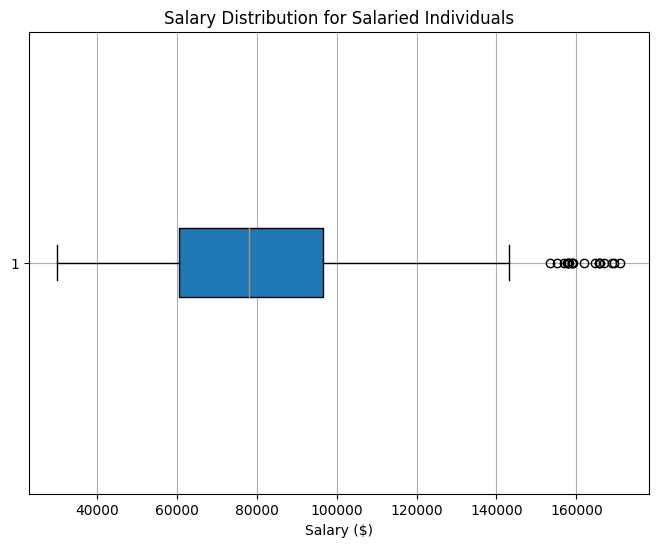

In [38]:
plt.figure(figsize=(8, 6))
plt.boxplot(salaried_individuals['Total_salary'], vert=False, patch_artist=True)

plt.title('Salary Distribution for Salaried Individuals')
plt.xlabel('Salary ($)')
plt.grid(True)

plt.show()

In [39]:
fig = px.box(salaried_individuals, x='Total_salary', title='Salary Distribution for Salaried Individuals')

fig.update_layout(
    xaxis_title="Salary ($)",
    showlegend=False,
    template="plotly_white",
    width=800,
    height=600
)

fig.show()

In [40]:
sedan_data = data[data['Make'] == 'Sedan'][['Make', 'Price']]

print("Sedan Dataset with Prices:")
print(sedan_data)

Sedan Dataset with Prices:
       Make  Price
142   Sedan  43000
144   Sedan  53000
145   Sedan  47000
147   Sedan  52000
148   Sedan  35000
...     ...    ...
1557  Sedan  18000
1560  Sedan  18000
1563  Sedan  22000
1568  Sedan  23000
1574  Sedan  20000

[702 rows x 2 columns]


In [41]:
fig = px.box(sedan_data, x='Price', title='Sedan price distribution')

fig.update_layout(
    xaxis_title="Sedan price",
    showlegend=False,
    template="plotly_white",
    width=800,
    height=600
)

fig.show()

In [42]:
sedan_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,702,1,Sedan,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,702.0,NaN,NaN,NaN,34603.988604,11152.164304,18000.0,24000.0,33000.0,44000.0,55000.0


<ipython-input-43-1c0d3bfa375f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




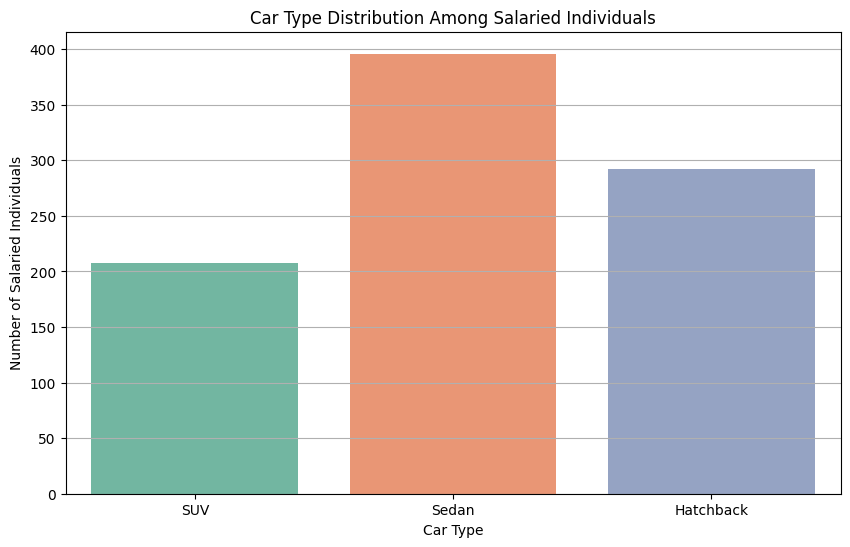

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', data=salaried_individuals, palette='Set2',)

plt.title('Car Type Distribution Among Salaried Individuals')
plt.xlabel('Car Type')
plt.ylabel('Number of Salaried Individuals')
plt.grid(axis='y')


plt.show()

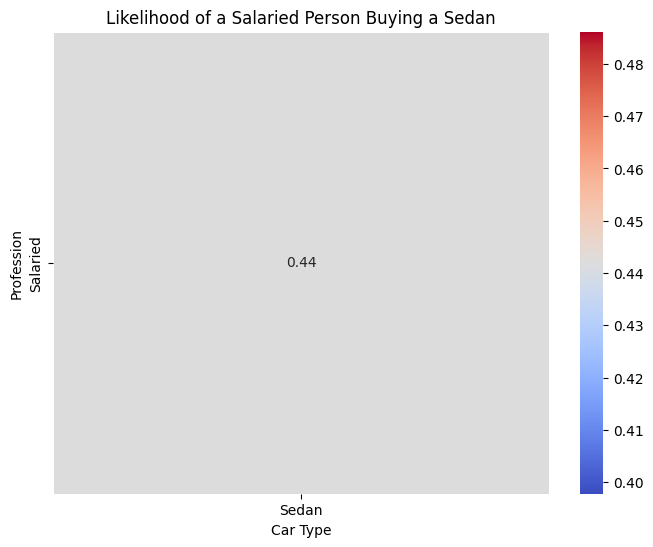

In [44]:

total_salaried = len(salaried_individuals)
salaried_sedan_buyers = salaried_individuals[salaried_individuals['Make'] == 'Sedan']
num_salaried_sedan = len(salaried_sedan_buyers)

likelihood_sedan = num_salaried_sedan / total_salaried

likelihood_data = pd.DataFrame({
    'Profession': ['Salaried'],
    'Car Type': ['Sedan'],
    'Likelihood': [likelihood_sedan]
})


heatmap_data = likelihood_data.pivot(index='Profession', columns='Car Type', values='Likelihood')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, fmt='.2f')


plt.title('Likelihood of a Salaried Person Buying a Sedan')
plt.xlabel('Car Type')
plt.ylabel('Profession')

plt.show()

In [45]:
male_salaried= data[(data['Profession'] == 'Salaried') & (data['Gender'] == 'Male')]

print("Salaried Male Data:")
print(male_salaried)

Salaried Male Data:
      Age Gender Profession Marital_status      Education  No_of_Dependents  \
4      53   Male   Salaried        married  Post Graduate                 3   
7      52   Male   Salaried        married       Graduate                 4   
8      52   Male   Salaried        married  Post Graduate                 4   
9      52   Male   Salaried        married  Post Graduate                 3   
10     52   Male   Salaried        married  Post Graduate                 4   
...   ...    ...        ...            ...            ...               ...   
1569   22   Male   Salaried        married       Graduate                 3   
1574   22   Male   Salaried        married       Graduate                 3   
1575   22   Male   Salaried        married       Graduate                 3   
1576   22   Male   Salaried         single       Graduate                 2   
1580   22   Male   Salaried        married       Graduate                 4   

     Personal_loan House_loan P

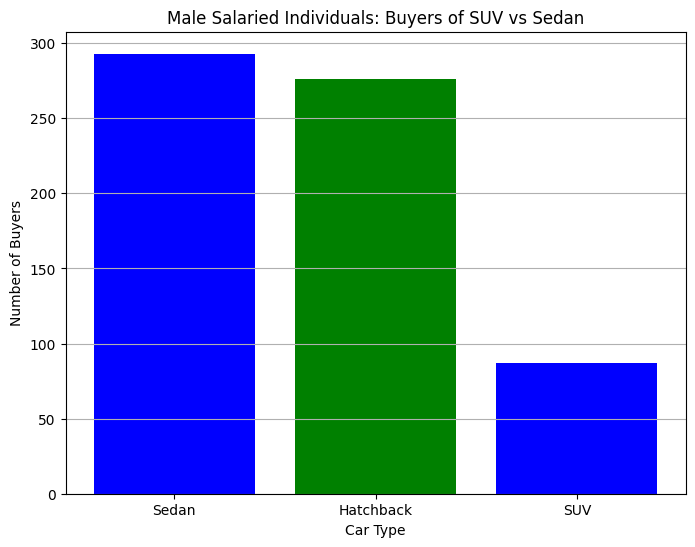

In [46]:
car_type_counts = male_salaried['Make'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(car_type_counts.index, car_type_counts.values, color=['blue', 'green'])

# Customizing the plot
plt.title('Male Salaried Individuals: Buyers of SUV vs Sedan')
plt.xlabel('Car Type')
plt.ylabel('Number of Buyers')
plt.grid(axis='y')

# Show the plot
plt.show()

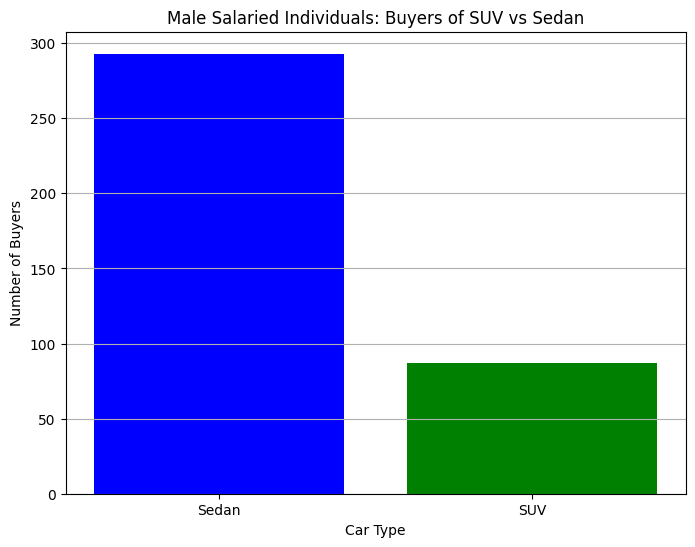

In [47]:
car_data = male_salaried[male_salaried['Make'].isin(['SUV', 'Sedan'])]

# Step 2: Count the number of SUV and Sedan buyers
car_count = car_data['Make'].value_counts()

# Step 3: Plotting
plt.figure(figsize=(8, 6))
plt.bar(car_count.index, car_count.values, color=['blue', 'green'])

# Customizing the plot
plt.title('Male Salaried Individuals: Buyers of SUV vs Sedan')
plt.xlabel('Car Type')
plt.ylabel('Number of Buyers')
plt.grid(axis='y')

# Show the plot
plt.show()

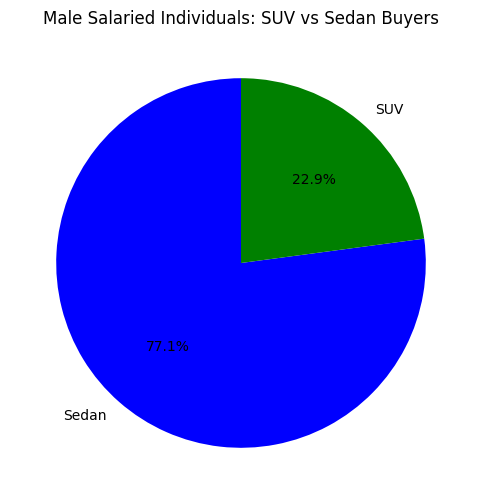

In [48]:
# Step 1: Same as above to filter for SUVs and Sedans
car_data = male_salaried[male_salaried['Make'].isin(['SUV', 'Sedan'])]

# Step 2: Count the number of SUV and Sedan buyers
car_count = car_data['Make'].value_counts()

# Step 3: Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(car_count.values, labels=car_count.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)

# Customizing the plot
plt.title('Male Salaried Individuals: SUV vs Sedan Buyers')

# Show the plot
plt.show()


In [49]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
0,53,Male,Business,married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,50-60
1,53,Female,Salaried,married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,50-60
2,53,Female,Salaried,married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,50-60
3,53,Female,Salaried,married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,50-60
4,53,Male,Salaried,married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,50-60


In [50]:
import plotly.express as px

# Assuming your dataset is named `data` and has columns 'Gender' and 'Price'

# Create the Plotly box plot
fig = px.box(data, x='Gender', y='Price', title='Amount Spent on Cars by Gender')

# Show the plot
fig.show()


In [51]:

gender_stats = data.groupby('Gender')['Price'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])


print(gender_stats)


        count          mean   median    min    max           std
Gender                                                          
Female    352  46235.795455  48000.0  18000  69000  12514.541852
Male     1229  32550.854353  29000.0  18000  70000  12355.617997


In [90]:
fig = px.violin(data, x='Gender', y='Price', box=True, title='Distribution of Amount Spent by Gender',
                 labels={'Price': 'Amount Spent', 'Gender': 'Gender'}, color='Gender')

fig.update_layout(
    width=900,
    height=1000,
    xaxis=dict(title_font=dict(size=18, family='Arial Black')),
    yaxis=dict(title_font=dict(size=18, family='Arial Black'))
)

fig.show()

In [53]:
fig = px.violin(data, x='Gender', y='Price', box=True, title='Distribution of Amount Spent by Gender',
                 labels={'Price': 'Amount Spent', 'Gender': 'Gender'}, color='Gender')


fig.update_layout(
    width=900,
    height=1000
)

fig.show()

<ipython-input-54-489285b95919>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




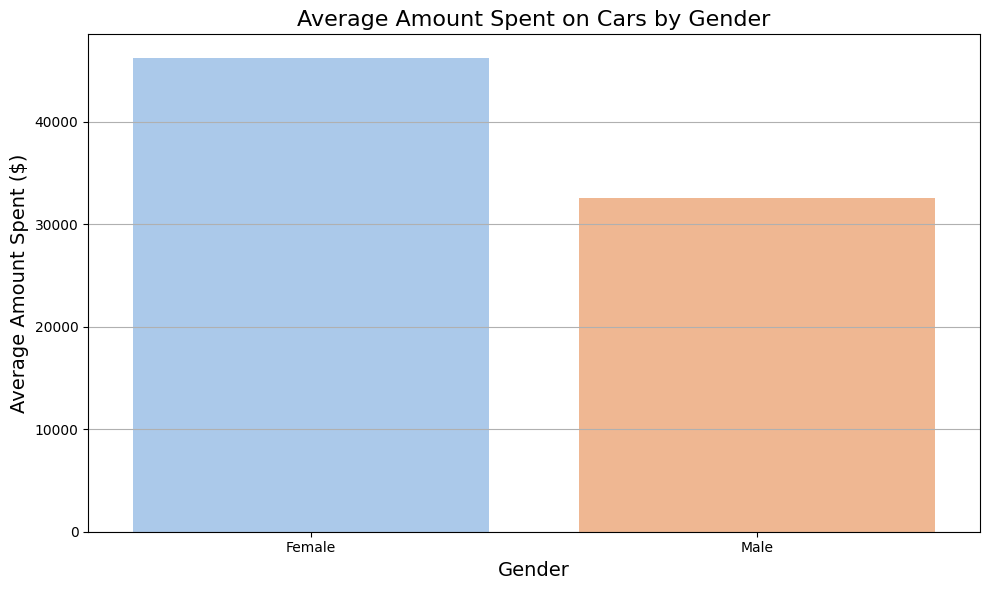

In [54]:

mean_prices = data.groupby('Gender')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Price', data=mean_prices, palette='pastel')

plt.title('Average Amount Spent on Cars by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Amount Spent ($)', fontsize=14)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [57]:
loan_taken = data[data['Personal_loan'] == 'Yes']

In [61]:
loan_taken['Personal_loan'].count()

792

In [62]:
#. How much money was spent on purchasing automobiles by individuals who took a personal loan?
total_spent_personal_loan = loan_taken['Price'].sum()

print(f'Total money spent on purchasing automobiles by individuals who took a personal loan: ${total_spent_personal_loan:.2f}')

Total money spent on purchasing automobiles by individuals who took a personal loan: $27290000.00


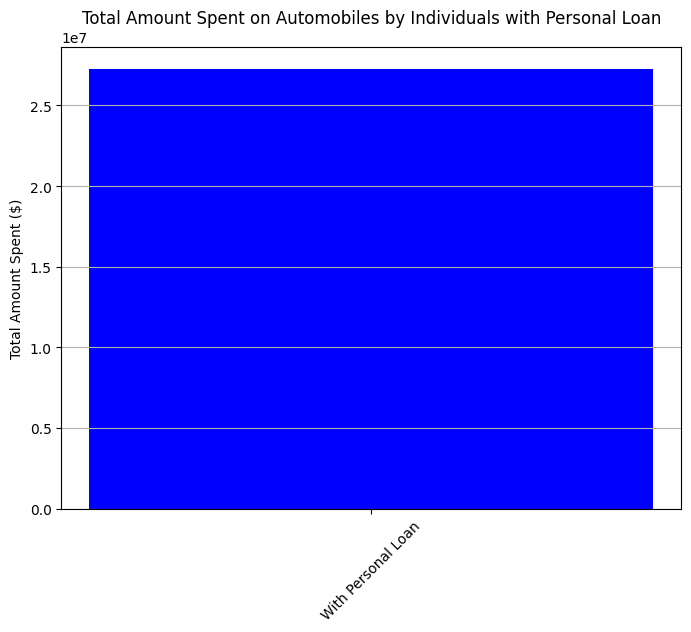

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(['With Personal Loan'], [total_spent_personal_loan], color='blue')

# Customize the plot
plt.title('Total Amount Spent on Automobiles by Individuals with Personal Loan')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

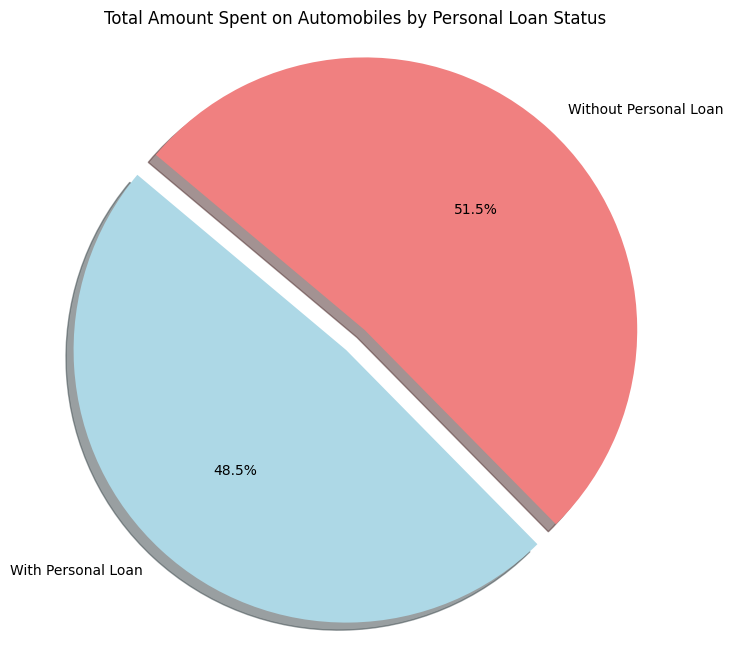

In [66]:
total_spent_with_loan = data[data['Personal_loan'] == 'Yes']['Price'].sum()
total_spent_without_loan = data[data['Personal_loan'] == 'No']['Price'].sum()


labels = ['With Personal Loan', 'Without Personal Loan']
sizes = [total_spent_with_loan, total_spent_without_loan]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Total Amount Spent on Automobiles by Personal Loan Status')
plt.axis('equal')

plt.show()

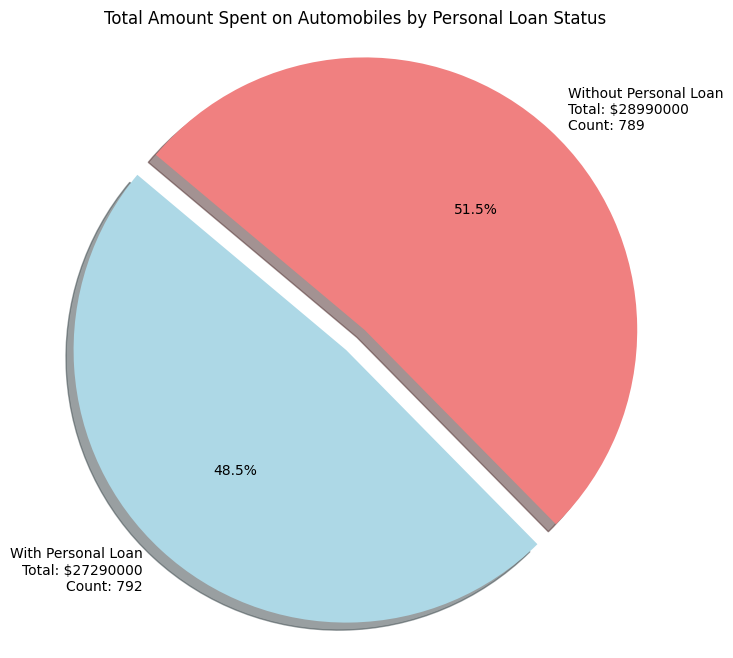

In [68]:
total_spent_with_loan = data[data['Personal_loan'] == 'Yes']['Price'].sum()
total_spent_without_loan = data[data['Personal_loan'] == 'No']['Price'].sum()

count_with_loan = data[data['Personal_loan'] == 'Yes'].shape[0]
count_without_loan = data[data['Personal_loan'] == 'No'].shape[0]

labels = [
    f'With Personal Loan\nTotal: ${total_spent_with_loan}\nPerson Count: {count_with_loan}',
    f'Without Personal Loan\nTotal: ${total_spent_without_loan}\n Person Count: {count_without_loan}'
]
sizes = [total_spent_with_loan, total_spent_without_loan]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Total Amount Spent on Automobiles by Personal Loan Status')
plt.axis('equal')

plt.show()

In [69]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Age_group
0,53,Male,Business,married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,50-60
1,53,Female,Salaried,married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,50-60
2,53,Female,Salaried,married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,50-60
3,53,Female,Salaried,married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,50-60
4,53,Male,Salaried,married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,50-60


In [70]:
grouped_stats = data.groupby('Partner_working')['Price'].agg(['mean', 'median', 'std', 'count'])

# Display the summary statistics
print("Descriptive Statistics by Working Partner Status:")
print(grouped_stats)

Descriptive Statistics by Working Partner Status:
                         mean   median           std  count
Partner_working                                            
No               36000.000000  31000.0  13817.734086    713
Yes              35267.281106  31000.0  13479.532555    868


<ipython-input-72-07d60288405c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




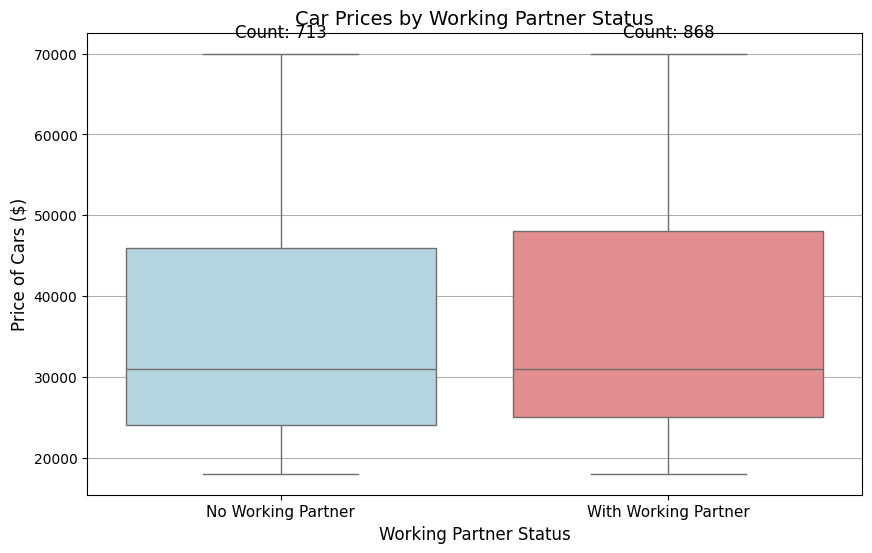

In [72]:
plt.figure(figsize=(10, 6))

# Custom color palette
palette = {'Yes': 'lightblue', 'No': 'lightcoral'}

# Boxplot with custom colors
sns.boxplot(x='Partner_working', y='Price', data=data, palette=palette)

# Adding title and labels
plt.title('Car Prices by Working Partner Status', fontsize=14)
plt.xlabel('Working Partner Status', fontsize=12)
plt.ylabel('Price of Cars ($)', fontsize=12)

# Adding custom xticks labels to match dataset values
plt.xticks(ticks=[0, 1], labels=['No Working Partner', 'With Working Partner'], fontsize=11)

# Adding counts of observations for each category
group_counts = data['Partner_working'].value_counts().to_dict()

for i, category in enumerate(['No', 'Yes']):
    plt.text(i, data[data['Partner_working'] == category]['Price'].max() + 2000,  # Positioning above the boxes
             f"Count: {group_counts[category]}", ha='center', fontsize=12, color='black')

# Grid for better readability
plt.grid(axis='y')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



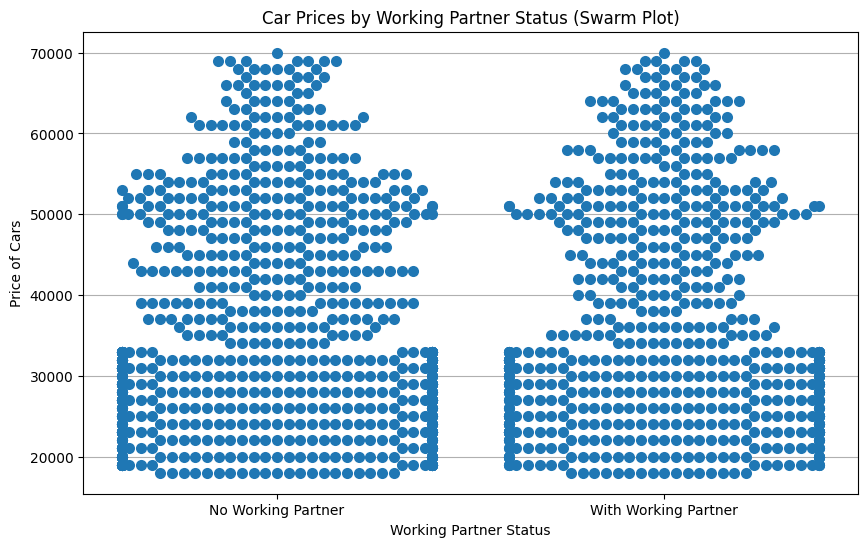

In [76]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Partner_working', y='Price', data=data, size=8);

plt.title('Car Prices by Working Partner Status (Swarm Plot)');
plt.xlabel('Working Partner Status');
plt.ylabel('Price of Cars');
plt.xticks([0, 1], ['No Working Partner', 'With Working Partner']);
plt.grid(axis='y');
plt.show();

<ipython-input-75-adac76c1b903>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-75-adac76c1b903>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




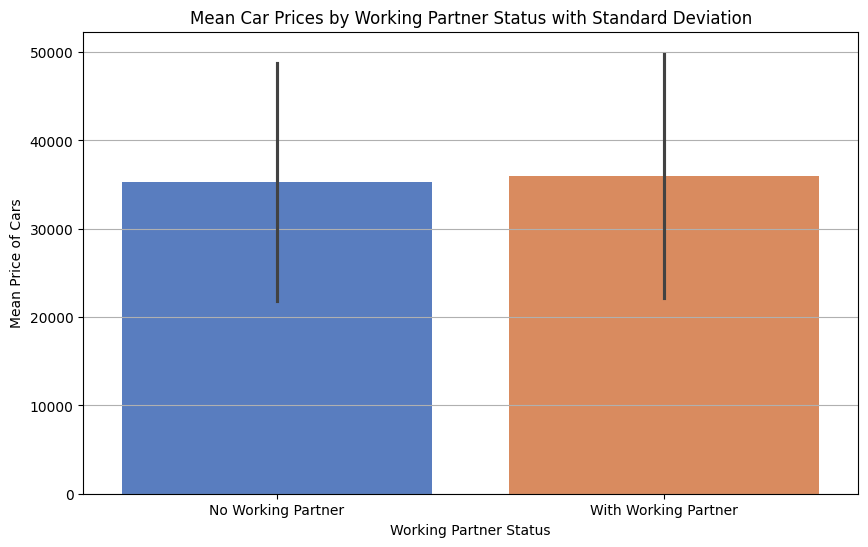

In [75]:
mean_std = data.groupby('Partner_working')['Price'].agg(['mean', 'std'])

# Bar Plot with error bars (standard deviation)
plt.figure(figsize=(10, 6))
sns.barplot(x='Partner_working', y='Price', data=data, ci="sd", palette="muted")

plt.title('Mean Car Prices by Working Partner Status with Standard Deviation')
plt.xlabel('Working Partner Status')
plt.ylabel('Mean Price of Cars')
plt.xticks([0, 1], ['No Working Partner', 'With Working Partner'])
plt.grid(axis='y')
plt.show()

In [80]:
high_price_threshold = 69000

# Filter the data where the price is greater than the threshold
high_priced_cars = data[data['Price'] > high_price_threshold]

# Display the filtered high-priced cars data
print(high_priced_cars)

     Age Gender Profession Marital_status      Education  No_of_Dependents  \
102   50   Male   Salaried        married       Graduate                 4   
476   35   Male   Business        married  Post Graduate                 4   

    Personal_loan House_loan Partner_working  Salary  Partner_salary  \
102            No         No              No   72000             0.0   
476           Yes         No             Yes   67600         40900.0   

     Total_salary  Price Make Age_group  
102         72000  70000  SUV     40-50  
476        108500  70000  SUV     30-40  


<ipython-input-82-4c933a01be01>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




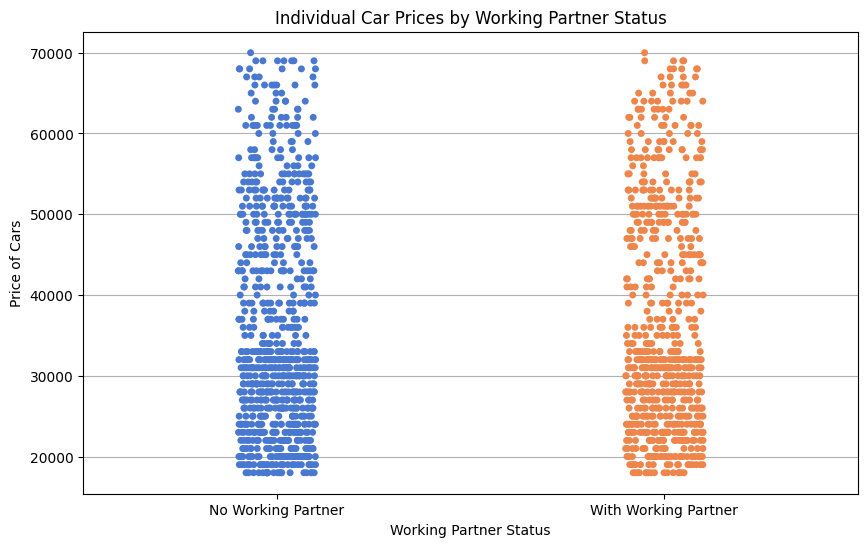

In [82]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Partner_working', y='Price', data=data, jitter=True, palette="muted")

plt.title('Individual Car Prices by Working Partner Status')
plt.xlabel('Working Partner Status')
plt.ylabel('Price of Cars')
plt.xticks([0, 1], ['No Working Partner', 'With Working Partner'])
plt.grid(axis='y')
plt.show()

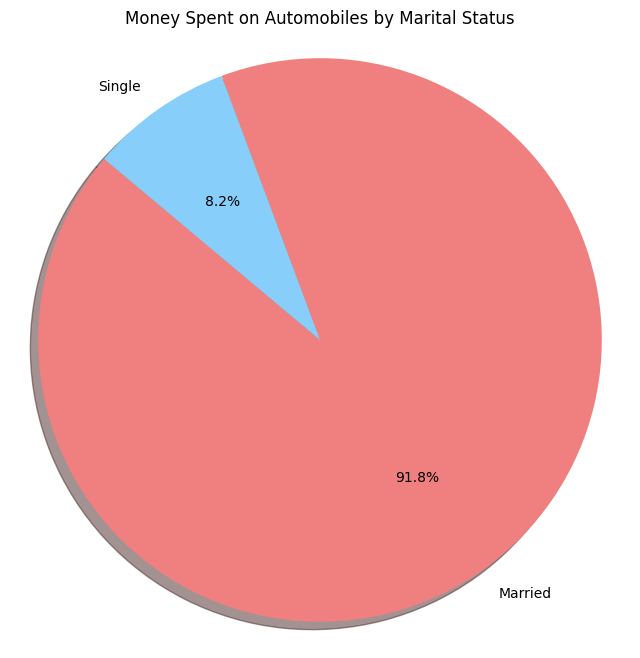

In [85]:
total_spent_by_marital_status = data.groupby('Marital_status')['Price'].sum()

labels = ['Married', 'Single']
sizes = [total_spent_by_marital_status['married'], total_spent_by_marital_status['single']]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Money Spent on Automobiles by Marital Status')

plt.axis('equal')
plt.show()

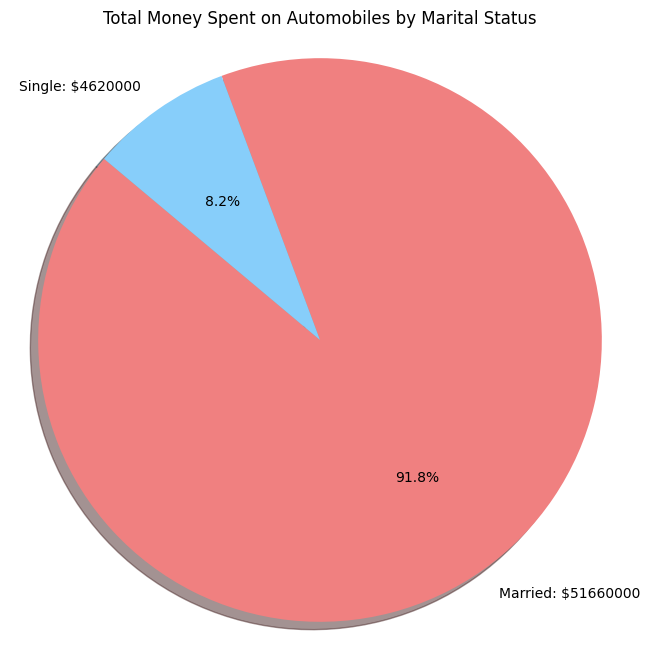

In [86]:
total_spent_by_marital_status = data.groupby('Marital_status')['Price'].sum()

labels = ['Married', 'Single']
sizes = [total_spent_by_marital_status['married'], total_spent_by_marital_status['single']]
colors = ['lightcoral', 'lightskyblue']

labels_with_amount = [f'Married: ${total_spent_by_marital_status["married"]:.0f}',
                      f'Single: ${total_spent_by_marital_status["single"]:.0f}']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels_with_amount, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Total Money Spent on Automobiles by Marital Status')

plt.axis('equal')

plt.show()

<ipython-input-87-77d84a768531>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




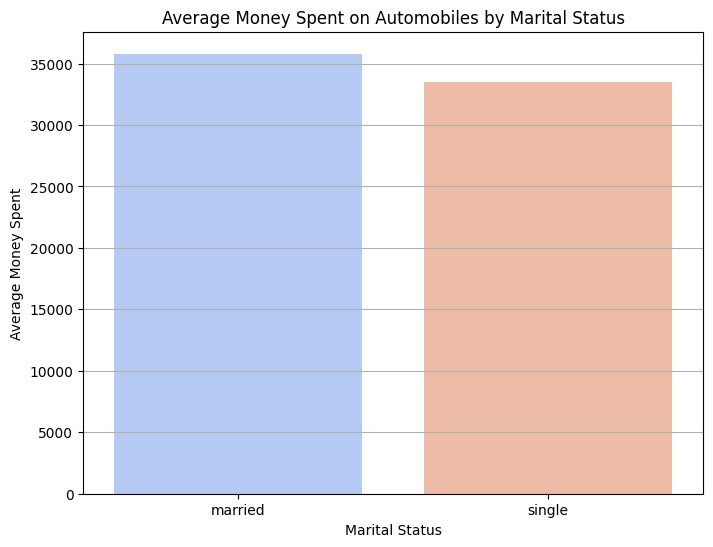

In [87]:
average_spent_by_marital_status = data.groupby('Marital_status')['Price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_spent_by_marital_status.index, y=average_spent_by_marital_status.values, palette='coolwarm')

plt.title('Average Money Spent on Automobiles by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Money Spent')
plt.grid(axis='y')

plt.show()